## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

##  Metric definition

In [2]:
def rmse(predictions, reals):
    error = np.sqrt(mean_squared_error(predictions, reals))
    return error

## Loading data

In [3]:
DATA_PATH = '../data/'
train_data = pd.read_csv(DATA_PATH + 'train.csv')

In [4]:
target = np.log(train_data['SalePrice'])
exclude_columns = ['SalePrice','Id','PoolQC','MiscFeature','Fence','Alley']
train_data = train_data.drop(exclude_columns, axis=1)

In [5]:
numerical_features = train_data.select_dtypes(['int64','float64']).columns
categorical_features = train_data.select_dtypes(['object']).columns

## Pipeline creation

Creating the pipelines for numerical and categorical variables.
For numerical features, the strategy for missing values is to impute the median of that features
For categorical, the strategy is to imput the most frequent value of that category and then to apply one hot encoding to the features. If a category is present only in the test set, then it should be ignored.

In [17]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=True))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

In [23]:
rf_model = RandomForestRegressor(n_estimators=100)

In [24]:
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_model)
])

## Creating a test set for evaluation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.33, random_state=0)

In [26]:
rf_pipeline.fit(X_train, y_train)
train_predictions = rf_pipeline.predict(X_train)
train_error = rmse(train_predictions, y_train)
test_predictions = rf_pipeline.predict(X_test)
test_error = rmse(test_predictions, y_test)

print('RMSE on the training set {}'.format(train_error))
print('RMSE on the testing set {}'.format(rmse(test_predictions, y_test)))

RMSE on the training set 0.054360855920125344
RMSE on the testing set 0.1344424367790441


## Experimenting with XGBoost

In [27]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [42]:
xgbm = XGBRegressor(n_estimators=100000, learning_rate=0.01)
xgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=500)

[18:51:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.4116
Will train until validation_0-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:11.2977
[2]	validation_0-rmse:11.1849
[3]	validation_0-rmse:11.0732
[4]	validation_0-rmse:10.9627
[5]	validation_0-rmse:10.8533
[6]	validation_0-rmse:10.7449
[7]	validation_0-rmse:10.6377
[8]	validation_0-rmse:10.5315
[9]	validation_0-rmse:10.4264
[10]	validation_0-rmse:10.3223
[11]	validation_0-rmse:10.2193
[12]	validation_0-rmse:10.1173
[13]	validation_0-rmse:10.0163
[14]	validation_0-rmse:9.91633
[15]	validation_0-rmse:9.81736
[16]	validation_0-rmse:9.71938
[17]	validation_0-rmse:9.62239
[18]	validation_0-rmse:9.52636
[19]	validation_0-rmse:9.43129
[20]	validation_0-rmse:9.33718
[21]	validation_0-rmse:9.24401
[22]	validation_0-rmse:9.15177
[23]	validation_0-rmse:9.06045
[24]	validation_0-rmse:8.97005
[25]	

[253]	validation_0-rmse:0.927003
[254]	validation_0-rmse:0.91811
[255]	validation_0-rmse:0.909308
[256]	validation_0-rmse:0.900605
[257]	validation_0-rmse:0.891937
[258]	validation_0-rmse:0.883381
[259]	validation_0-rmse:0.874924
[260]	validation_0-rmse:0.866562
[261]	validation_0-rmse:0.858282
[262]	validation_0-rmse:0.850168
[263]	validation_0-rmse:0.842046
[264]	validation_0-rmse:0.834011
[265]	validation_0-rmse:0.825997
[266]	validation_0-rmse:0.818125
[267]	validation_0-rmse:0.810273
[268]	validation_0-rmse:0.802486
[269]	validation_0-rmse:0.794871
[270]	validation_0-rmse:0.787347
[271]	validation_0-rmse:0.779838
[272]	validation_0-rmse:0.77255
[273]	validation_0-rmse:0.765247
[274]	validation_0-rmse:0.758025
[275]	validation_0-rmse:0.75093
[276]	validation_0-rmse:0.74385
[277]	validation_0-rmse:0.736866
[278]	validation_0-rmse:0.729822
[279]	validation_0-rmse:0.722958
[280]	validation_0-rmse:0.716248
[281]	validation_0-rmse:0.709533
[282]	validation_0-rmse:0.702856
[283]	validati

[503]	validation_0-rmse:0.15875
[504]	validation_0-rmse:0.158278
[505]	validation_0-rmse:0.157813
[506]	validation_0-rmse:0.157406
[507]	validation_0-rmse:0.157004
[508]	validation_0-rmse:0.156596
[509]	validation_0-rmse:0.156156
[510]	validation_0-rmse:0.155748
[511]	validation_0-rmse:0.155374
[512]	validation_0-rmse:0.155005
[513]	validation_0-rmse:0.154642
[514]	validation_0-rmse:0.154271
[515]	validation_0-rmse:0.15392
[516]	validation_0-rmse:0.153572
[517]	validation_0-rmse:0.153203
[518]	validation_0-rmse:0.152905
[519]	validation_0-rmse:0.152524
[520]	validation_0-rmse:0.152164
[521]	validation_0-rmse:0.151846
[522]	validation_0-rmse:0.151517
[523]	validation_0-rmse:0.151206
[524]	validation_0-rmse:0.15087
[525]	validation_0-rmse:0.150569
[526]	validation_0-rmse:0.150274
[527]	validation_0-rmse:0.149982
[528]	validation_0-rmse:0.149682
[529]	validation_0-rmse:0.149398
[530]	validation_0-rmse:0.1491
[531]	validation_0-rmse:0.148791
[532]	validation_0-rmse:0.148508
[533]	validatio

[753]	validation_0-rmse:0.129937
[754]	validation_0-rmse:0.129933
[755]	validation_0-rmse:0.129925
[756]	validation_0-rmse:0.129903
[757]	validation_0-rmse:0.129868
[758]	validation_0-rmse:0.129863
[759]	validation_0-rmse:0.129836
[760]	validation_0-rmse:0.129808
[761]	validation_0-rmse:0.129805
[762]	validation_0-rmse:0.129809
[763]	validation_0-rmse:0.129787
[764]	validation_0-rmse:0.129742
[765]	validation_0-rmse:0.129733
[766]	validation_0-rmse:0.129704
[767]	validation_0-rmse:0.129672
[768]	validation_0-rmse:0.129669
[769]	validation_0-rmse:0.129642
[770]	validation_0-rmse:0.129622
[771]	validation_0-rmse:0.129596
[772]	validation_0-rmse:0.129597
[773]	validation_0-rmse:0.129592
[774]	validation_0-rmse:0.12959
[775]	validation_0-rmse:0.129572
[776]	validation_0-rmse:0.129555
[777]	validation_0-rmse:0.129524
[778]	validation_0-rmse:0.1295
[779]	validation_0-rmse:0.129476
[780]	validation_0-rmse:0.129454
[781]	validation_0-rmse:0.129454
[782]	validation_0-rmse:0.129458
[783]	validat

[1003]	validation_0-rmse:0.126696
[1004]	validation_0-rmse:0.126702
[1005]	validation_0-rmse:0.126681
[1006]	validation_0-rmse:0.12667
[1007]	validation_0-rmse:0.126672
[1008]	validation_0-rmse:0.126657
[1009]	validation_0-rmse:0.126645
[1010]	validation_0-rmse:0.126637
[1011]	validation_0-rmse:0.126623
[1012]	validation_0-rmse:0.126606
[1013]	validation_0-rmse:0.126594
[1014]	validation_0-rmse:0.126597
[1015]	validation_0-rmse:0.126575
[1016]	validation_0-rmse:0.126555
[1017]	validation_0-rmse:0.12656
[1018]	validation_0-rmse:0.126528
[1019]	validation_0-rmse:0.126521
[1020]	validation_0-rmse:0.12651
[1021]	validation_0-rmse:0.1265
[1022]	validation_0-rmse:0.126487
[1023]	validation_0-rmse:0.126473
[1024]	validation_0-rmse:0.126458
[1025]	validation_0-rmse:0.126445
[1026]	validation_0-rmse:0.126421
[1027]	validation_0-rmse:0.126409
[1028]	validation_0-rmse:0.1264
[1029]	validation_0-rmse:0.126404
[1030]	validation_0-rmse:0.1264
[1031]	validation_0-rmse:0.12638
[1032]	validation_0-rmse

[1245]	validation_0-rmse:0.124207
[1246]	validation_0-rmse:0.12419
[1247]	validation_0-rmse:0.124203
[1248]	validation_0-rmse:0.124212
[1249]	validation_0-rmse:0.124198
[1250]	validation_0-rmse:0.124198
[1251]	validation_0-rmse:0.12419
[1252]	validation_0-rmse:0.124183
[1253]	validation_0-rmse:0.124181
[1254]	validation_0-rmse:0.124187
[1255]	validation_0-rmse:0.124159
[1256]	validation_0-rmse:0.124148
[1257]	validation_0-rmse:0.124149
[1258]	validation_0-rmse:0.124149
[1259]	validation_0-rmse:0.12414
[1260]	validation_0-rmse:0.124139
[1261]	validation_0-rmse:0.124121
[1262]	validation_0-rmse:0.124118
[1263]	validation_0-rmse:0.124128
[1264]	validation_0-rmse:0.124134
[1265]	validation_0-rmse:0.124136
[1266]	validation_0-rmse:0.124125
[1267]	validation_0-rmse:0.12412
[1268]	validation_0-rmse:0.124121
[1269]	validation_0-rmse:0.124105
[1270]	validation_0-rmse:0.124095
[1271]	validation_0-rmse:0.124083
[1272]	validation_0-rmse:0.12408
[1273]	validation_0-rmse:0.124083
[1274]	validation_0

[1487]	validation_0-rmse:0.123177
[1488]	validation_0-rmse:0.123171
[1489]	validation_0-rmse:0.12316
[1490]	validation_0-rmse:0.123152
[1491]	validation_0-rmse:0.123149
[1492]	validation_0-rmse:0.123157
[1493]	validation_0-rmse:0.123157
[1494]	validation_0-rmse:0.123162
[1495]	validation_0-rmse:0.123161
[1496]	validation_0-rmse:0.123159
[1497]	validation_0-rmse:0.123162
[1498]	validation_0-rmse:0.123158
[1499]	validation_0-rmse:0.123169
[1500]	validation_0-rmse:0.12316
[1501]	validation_0-rmse:0.123162
[1502]	validation_0-rmse:0.12316
[1503]	validation_0-rmse:0.12315
[1504]	validation_0-rmse:0.123144
[1505]	validation_0-rmse:0.123149
[1506]	validation_0-rmse:0.123144
[1507]	validation_0-rmse:0.123151
[1508]	validation_0-rmse:0.12314
[1509]	validation_0-rmse:0.123143
[1510]	validation_0-rmse:0.123137
[1511]	validation_0-rmse:0.123136
[1512]	validation_0-rmse:0.123129
[1513]	validation_0-rmse:0.123123
[1514]	validation_0-rmse:0.123133
[1515]	validation_0-rmse:0.12313
[1516]	validation_0-

[1729]	validation_0-rmse:0.122676
[1730]	validation_0-rmse:0.122667
[1731]	validation_0-rmse:0.122663
[1732]	validation_0-rmse:0.122657
[1733]	validation_0-rmse:0.122657
[1734]	validation_0-rmse:0.122653
[1735]	validation_0-rmse:0.12264
[1736]	validation_0-rmse:0.122632
[1737]	validation_0-rmse:0.122628
[1738]	validation_0-rmse:0.122635
[1739]	validation_0-rmse:0.122617
[1740]	validation_0-rmse:0.122623
[1741]	validation_0-rmse:0.122622
[1742]	validation_0-rmse:0.122632
[1743]	validation_0-rmse:0.122635
[1744]	validation_0-rmse:0.122624
[1745]	validation_0-rmse:0.12262
[1746]	validation_0-rmse:0.122624
[1747]	validation_0-rmse:0.122619
[1748]	validation_0-rmse:0.12261
[1749]	validation_0-rmse:0.122613
[1750]	validation_0-rmse:0.122597
[1751]	validation_0-rmse:0.122599
[1752]	validation_0-rmse:0.122593
[1753]	validation_0-rmse:0.122588
[1754]	validation_0-rmse:0.122585
[1755]	validation_0-rmse:0.122587
[1756]	validation_0-rmse:0.122593
[1757]	validation_0-rmse:0.122579
[1758]	validation

[1971]	validation_0-rmse:0.122055
[1972]	validation_0-rmse:0.122061
[1973]	validation_0-rmse:0.122061
[1974]	validation_0-rmse:0.12206
[1975]	validation_0-rmse:0.122053
[1976]	validation_0-rmse:0.122046
[1977]	validation_0-rmse:0.122042
[1978]	validation_0-rmse:0.122048
[1979]	validation_0-rmse:0.122042
[1980]	validation_0-rmse:0.122043
[1981]	validation_0-rmse:0.12203
[1982]	validation_0-rmse:0.122033
[1983]	validation_0-rmse:0.122027
[1984]	validation_0-rmse:0.122027
[1985]	validation_0-rmse:0.122022
[1986]	validation_0-rmse:0.122021
[1987]	validation_0-rmse:0.122023
[1988]	validation_0-rmse:0.122019
[1989]	validation_0-rmse:0.122025
[1990]	validation_0-rmse:0.122028
[1991]	validation_0-rmse:0.122025
[1992]	validation_0-rmse:0.122027
[1993]	validation_0-rmse:0.122024
[1994]	validation_0-rmse:0.122021
[1995]	validation_0-rmse:0.122022
[1996]	validation_0-rmse:0.122017
[1997]	validation_0-rmse:0.122018
[1998]	validation_0-rmse:0.122016
[1999]	validation_0-rmse:0.122006
[2000]	validatio

[2214]	validation_0-rmse:0.121795
[2215]	validation_0-rmse:0.121789
[2216]	validation_0-rmse:0.121789
[2217]	validation_0-rmse:0.121791
[2218]	validation_0-rmse:0.121791
[2219]	validation_0-rmse:0.121792
[2220]	validation_0-rmse:0.121782
[2221]	validation_0-rmse:0.121784
[2222]	validation_0-rmse:0.121783
[2223]	validation_0-rmse:0.121782
[2224]	validation_0-rmse:0.121784
[2225]	validation_0-rmse:0.121789
[2226]	validation_0-rmse:0.121787
[2227]	validation_0-rmse:0.12179
[2228]	validation_0-rmse:0.121808
[2229]	validation_0-rmse:0.121809
[2230]	validation_0-rmse:0.121806
[2231]	validation_0-rmse:0.121808
[2232]	validation_0-rmse:0.121812
[2233]	validation_0-rmse:0.121815
[2234]	validation_0-rmse:0.121811
[2235]	validation_0-rmse:0.121803
[2236]	validation_0-rmse:0.121806
[2237]	validation_0-rmse:0.121803
[2238]	validation_0-rmse:0.121809
[2239]	validation_0-rmse:0.121814
[2240]	validation_0-rmse:0.121811
[2241]	validation_0-rmse:0.121815
[2242]	validation_0-rmse:0.121819
[2243]	validati

[2456]	validation_0-rmse:0.121836
[2457]	validation_0-rmse:0.121839
[2458]	validation_0-rmse:0.121836
[2459]	validation_0-rmse:0.121845
[2460]	validation_0-rmse:0.121838
[2461]	validation_0-rmse:0.121841
[2462]	validation_0-rmse:0.12184
[2463]	validation_0-rmse:0.121841
[2464]	validation_0-rmse:0.121839
[2465]	validation_0-rmse:0.121845
[2466]	validation_0-rmse:0.121845
[2467]	validation_0-rmse:0.121839
[2468]	validation_0-rmse:0.121854
[2469]	validation_0-rmse:0.121848
[2470]	validation_0-rmse:0.121846
[2471]	validation_0-rmse:0.121844
[2472]	validation_0-rmse:0.121848
[2473]	validation_0-rmse:0.121848
[2474]	validation_0-rmse:0.121844
[2475]	validation_0-rmse:0.121842
[2476]	validation_0-rmse:0.121837
[2477]	validation_0-rmse:0.121834
[2478]	validation_0-rmse:0.12183
[2479]	validation_0-rmse:0.121849
[2480]	validation_0-rmse:0.121858
[2481]	validation_0-rmse:0.121859
[2482]	validation_0-rmse:0.121858
[2483]	validation_0-rmse:0.121858
[2484]	validation_0-rmse:0.121855
[2485]	validatio

[2698]	validation_0-rmse:0.121728
[2699]	validation_0-rmse:0.121731
[2700]	validation_0-rmse:0.121727
[2701]	validation_0-rmse:0.121735
[2702]	validation_0-rmse:0.121733
[2703]	validation_0-rmse:0.12173
[2704]	validation_0-rmse:0.121729
[2705]	validation_0-rmse:0.121729
[2706]	validation_0-rmse:0.121738
[2707]	validation_0-rmse:0.121731
[2708]	validation_0-rmse:0.121722
[2709]	validation_0-rmse:0.121718
[2710]	validation_0-rmse:0.121715
[2711]	validation_0-rmse:0.121716
[2712]	validation_0-rmse:0.121714
[2713]	validation_0-rmse:0.121721
[2714]	validation_0-rmse:0.121724
[2715]	validation_0-rmse:0.12172
[2716]	validation_0-rmse:0.121722
[2717]	validation_0-rmse:0.121721
[2718]	validation_0-rmse:0.12173
[2719]	validation_0-rmse:0.121728
[2720]	validation_0-rmse:0.121725
[2721]	validation_0-rmse:0.121726
[2722]	validation_0-rmse:0.121725
[2723]	validation_0-rmse:0.121723
[2724]	validation_0-rmse:0.121717
[2725]	validation_0-rmse:0.121718
[2726]	validation_0-rmse:0.121713
[2727]	validation

[2940]	validation_0-rmse:0.121695
[2941]	validation_0-rmse:0.121693
[2942]	validation_0-rmse:0.121686
[2943]	validation_0-rmse:0.121695
[2944]	validation_0-rmse:0.121702
[2945]	validation_0-rmse:0.121697
[2946]	validation_0-rmse:0.1217
[2947]	validation_0-rmse:0.121698
[2948]	validation_0-rmse:0.121703
[2949]	validation_0-rmse:0.121707
[2950]	validation_0-rmse:0.121706
[2951]	validation_0-rmse:0.121713
[2952]	validation_0-rmse:0.121709
[2953]	validation_0-rmse:0.121719
[2954]	validation_0-rmse:0.121724
[2955]	validation_0-rmse:0.121722
[2956]	validation_0-rmse:0.121727
[2957]	validation_0-rmse:0.121726
[2958]	validation_0-rmse:0.121723
[2959]	validation_0-rmse:0.121722
[2960]	validation_0-rmse:0.121724
[2961]	validation_0-rmse:0.121727
[2962]	validation_0-rmse:0.121729
[2963]	validation_0-rmse:0.121732
[2964]	validation_0-rmse:0.121728
[2965]	validation_0-rmse:0.121728
[2966]	validation_0-rmse:0.121726
[2967]	validation_0-rmse:0.121718
[2968]	validation_0-rmse:0.121715
[2969]	validatio

[3182]	validation_0-rmse:0.121725
[3183]	validation_0-rmse:0.121722
[3184]	validation_0-rmse:0.121724
[3185]	validation_0-rmse:0.121722
[3186]	validation_0-rmse:0.121719
[3187]	validation_0-rmse:0.121725
[3188]	validation_0-rmse:0.121741
[3189]	validation_0-rmse:0.12174
[3190]	validation_0-rmse:0.121738
[3191]	validation_0-rmse:0.121735
[3192]	validation_0-rmse:0.121732
[3193]	validation_0-rmse:0.121731
[3194]	validation_0-rmse:0.121734
[3195]	validation_0-rmse:0.121733
[3196]	validation_0-rmse:0.121733
[3197]	validation_0-rmse:0.12173
[3198]	validation_0-rmse:0.12173
[3199]	validation_0-rmse:0.121736
[3200]	validation_0-rmse:0.121734
[3201]	validation_0-rmse:0.121737
[3202]	validation_0-rmse:0.121736
[3203]	validation_0-rmse:0.121734
[3204]	validation_0-rmse:0.121738
[3205]	validation_0-rmse:0.121741
[3206]	validation_0-rmse:0.121741
[3207]	validation_0-rmse:0.121741
[3208]	validation_0-rmse:0.121745
[3209]	validation_0-rmse:0.121751
[3210]	validation_0-rmse:0.121747
[3211]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

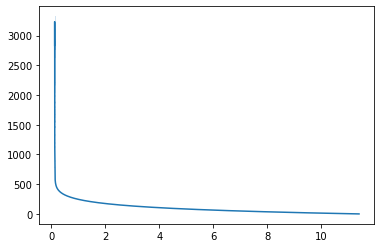

In [43]:
sns.lineplot(xgbm.evals_result_.get('validation_0').get('rmse'),
             range(len(xgbm.evals_result_.get('validation_0').get('rmse'))))

In [14]:
rmse(xgbm.predict(X_test), y_test)

0.12178257104145432

In [15]:
xgbm_pred = np.exp(xgbm.predict(X_test))
y_real = np.exp(y_test)

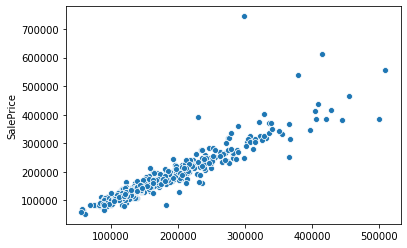

In [16]:
sns.scatterplot(xgbm_pred, y_real)